In [12]:
import triflow as trf
import scipy.signal as spsig
import numpy as np

import pylab as pl

import holoviews as hv

pl.style.use("publication")

%matplotlib inline

In [2]:
model = trf.Model("dx((h**3 + h**2) * dx(-sigma * dxxh + alpha * (1 / h**3 - e / h**4)))",
                  "h", ["sigma", "alpha", "e"])

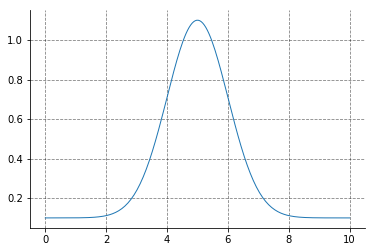

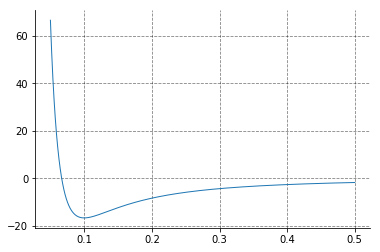

In [3]:
x = np.linspace(0, 10, 200)

e = 1E-1

h = (-(x - 5) ** 2 + 5 ** 2)
h /= h.max()
h -= 0.95
h *= 10
h[h < e] = e

h = spsig.savgol_filter(h, 51, 8)

h = spsig.gaussian(x.size, 20) + e
pl.figure()
pl.plot(x, h)
pl.figure()

y = np.linspace(.05, .5, 1000)
pl.plot(y, 1/3 * e / y**3 - 1/2 / y**2)

In [10]:
%%opts Curve [show_grid=True, width=800] {-framewise}

def hook(t, fields, pars):
    fields['h'][0] = 1E-3
    fields['h'][-1] = 1E-3
    return fields, pars

alpha = .05
simul = trf.Simulation(model, fields=model.fields_template(x=x, h=h),
                   dt=.01, tol=1E-1, tmax=.5, #  hook=hook,
                   parameters=dict(periodic=False, alpha=alpha, sigma=10, e=e),
                   )
container = simul.attach_container()
trf.display_fields(simul)

In [11]:
for t, fields in simul:
    print(t, end='\r')

In [13]:
hmap = hv.Dataset(simul.container.data.isel(t=slice(None, None, 15))).to(
    hv.Curve, "x", "h"
)

:GridSpace   [t]
   :Curve   [x]   (h)
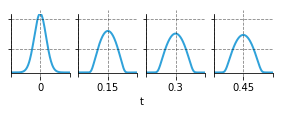

In [14]:
%%output backend="matplotlib" filename="droplet_out"
%%opts Curve [show_grid=True, fig_size=12]

hv.GridSpace(hmap)